In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math

In [71]:
train_df = pd.read_csv("train_clean.csv", index_col=0)
train_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,17.92,0.000054,1.750,1,80.0,5,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0
1,16.92,0.000034,0.290,0,200.0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,31.25,0.000112,0.000,1,96.0,19,0,0,1,0,...,1,0,0,1,1,0,1,0,0,0
3,48.17,0.000133,0.335,0,0.0,120,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
4,32.33,0.000350,0.500,0,232.0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0


In [72]:
val_df = pd.read_csv("val_clean.csv", index_col=0)
val_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,32.33,0.000750,1.585,0,420.0,0,1,0,1,0.0,...,0,1,1,0,0,1,0,0,1,0
1,23.58,0.000179,0.540,0,136.0,1,0,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0
2,36.42,0.000075,0.585,0,240.0,3,1,0,1,0.0,...,1,0,1,0,1,0,1,0,0,0
3,18.42,0.001042,0.125,0,120.0,375,0,0,1,0.0,...,0,1,1,0,1,0,1,0,0,0
4,24.50,0.001334,0.040,0,120.0,475,1,0,1,0.0,...,1,0,1,0,0,1,1,0,0,0


In [73]:
scaler = pd.read_csv("scaler.csv", index_col=0)
scaler

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,30.913206,0.000462,2.257771,2.070064,170.048832,657.492569,0.424628,0.333333,0.666667,0.002123,...,0.505308,0.494692,0.594480,0.405520,0.560510,0.439490,0.917197,0.002123,0.080679,0.424628
std,11.265351,0.000454,3.361196,3.850031,137.412811,1962.387448,0.494812,0.471906,0.471906,0.046078,...,0.500503,0.500503,0.491514,0.491514,0.496853,0.496853,0.275877,0.046078,0.272632,0.494812
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.540000,0.000106,0.165000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,27.830000,0.000275,1.000000,0.000000,160.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,36.750000,0.000700,2.605000,2.000000,260.000000,313.500000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,69.500000,0.002100,20.000000,23.000000,720.000000,18027.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
train_df = (train_df - train_df.min())/(train_df.max()-train_df.min())
val_df = (val_df - scaler.loc['min', :])/(scaler.loc['max', :]-scaler.loc['min', :])

In [75]:
val_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,0.333274,0.357143,0.07925,0.0,0.583333,0.000000,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.176323,0.085238,0.02700,0.0,0.188889,0.000055,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.406637,0.035714,0.02925,0.0,0.333333,0.000166,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.083767,0.495952,0.00625,0.0,0.166667,0.020802,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.192825,0.635000,0.00200,0.0,0.166667,0.026349,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
train_df.head()

,var1,var2,var7,var10,var13,var14,var15,a,b,3_l,...,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,class
0,0.074798,0.025714,0.08750,0.043478,0.111111,0.000277,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.056861,0.015952,0.01450,0.000000,0.277778,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.313901,0.053571,0.00000,0.043478,0.133333,0.001054,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.617399,0.063571,0.01675,0.000000,0.000000,0.006657,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.333274,0.166667,0.02500,0.000000,0.322222,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


After several tries, I realized that var15 existence was dropping val accuracy down because of it's high dependency with the labels in the training data, while it's not the case in validation data.

In [77]:
train_df.drop('var15', 1, inplace=True)
val_df.drop('var15', 1, inplace=True)

In [78]:
train_df.values.shape

(471, 47)

In [79]:
train_x = train_df.values[:, 0:-2]
train_y = train_df.values[:, -1]
val_x = val_df.values[:, 0:-2]
val_y = val_df.values[:, -1]

Here is the model arch with one hidden layer regularized by a dropout layer

In [456]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(1,  activation=tf.nn.sigmoid)
])

Here I used accuracy as an evaluation metric because it is a classification problem. It's a suitalble technique to figure out the percentage of the right predictions. As for the optimizer, I've chosen binary crossentropy as we have a binary classified data with it's labels represented by one vector of ones and zeros. If I used on hot encoding for the labels, I would choose categorical cross entropy. This is the same reason why I used sigmoid as an activation for the output layer. 

In [457]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])

In [458]:
num_examples = float(len(train_x))

In [459]:
hist = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50, batch_size = 64,
                shuffle=True, verbose=2)

Train on 471 samples, validate on 200 samples
Epoch 1/50
 - 1s - loss: 0.7464 - acc: 0.5690 - val_loss: 0.5439 - val_acc: 0.8550
Epoch 2/50
 - 0s - loss: 0.5151 - acc: 0.7962 - val_loss: 0.4024 - val_acc: 0.8700
Epoch 3/50
 - 0s - loss: 0.4259 - acc: 0.8195 - val_loss: 0.3391 - val_acc: 0.8750
Epoch 4/50
 - 0s - loss: 0.3981 - acc: 0.8301 - val_loss: 0.3327 - val_acc: 0.8750
Epoch 5/50
 - 0s - loss: 0.3768 - acc: 0.8514 - val_loss: 0.3235 - val_acc: 0.8700
Epoch 6/50
 - 0s - loss: 0.3734 - acc: 0.8493 - val_loss: 0.3255 - val_acc: 0.8700
Epoch 7/50
 - 0s - loss: 0.3640 - acc: 0.8535 - val_loss: 0.3293 - val_acc: 0.8750
Epoch 8/50
 - 0s - loss: 0.3633 - acc: 0.8535 - val_loss: 0.3411 - val_acc: 0.8800
Epoch 9/50
 - 0s - loss: 0.3352 - acc: 0.8556 - val_loss: 0.3509 - val_acc: 0.8800
Epoch 10/50
 - 0s - loss: 0.3231 - acc: 0.8577 - val_loss: 0.3534 - val_acc: 0.8600
Epoch 11/50
 - 0s - loss: 0.3461 - acc: 0.8599 - val_loss: 0.3648 - val_acc: 0.8650
Epoch 12/50
 - 0s - loss: 0.3279 - acc:

In [460]:
model.save("model.h5")

In [461]:
import matplotlib.pyplot as plt

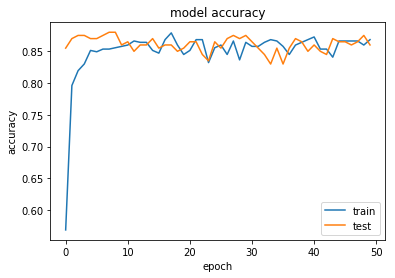

In [462]:
fig = plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

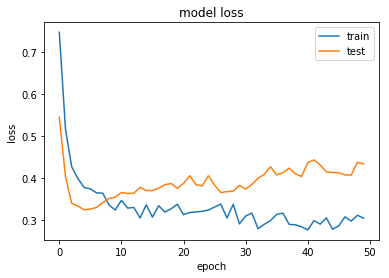

In [463]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')